In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import zipfile

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
local_zip = '/content/drive/MyDrive/Sampah.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
TRAINING_DIR = "/tmp/Sampah/train"
VALIDATION_DIR = "/tmp/Sampah/val"

TRAINING_Kaca_DIR = "/tmp/Sampah/train/Kaca"
VALIDATION_Kaca_DIR = "/tmp/Sampah/val/kaca"
TRAINING_Kardus_DIR = "/tmp/Sampah/train/Kardus"
VALIDATION_Kardus_DIR = "/tmp/Sampah/val/kardus"
TRAINING_Kertas_DIR = "/tmp/Sampah/train/Kertas"
VALIDATION_Kertas_DIR = "/tmp/Sampah/val/kertas"
TRAINING_Metal_DIR = "/tmp/Sampah/train/Metal"
VALIDATION_Metal_DIR = "/tmp/Sampah/val/metal"
TRAINING_Plastik_DIR = "/tmp/Sampah/train/Plastik"
VALIDATION_Plastik_DIR = "/tmp/Sampah/val/plastik"


print(f"\n\nThere are {len(os.listdir(TRAINING_Kaca_DIR))} images of glass for training")
print(f"There are {len(os.listdir(TRAINING_Kardus_DIR))} images of cardboard for training")
print(f"There are {len(os.listdir(TRAINING_Kertas_DIR))} images of paper for training")
print(f"There are {len(os.listdir(TRAINING_Metal_DIR))} images of metal for training")
print(f"There are {len(os.listdir(TRAINING_Plastik_DIR))} images of plastic for training")
print(f"There are {len(os.listdir(VALIDATION_Kaca_DIR))} images of glass for validation")
print(f"There are {len(os.listdir(VALIDATION_Kardus_DIR))} images of carboard for validation")
print(f"There are {len(os.listdir(VALIDATION_Kertas_DIR))} images of paper for validation")
print(f"There are {len(os.listdir(VALIDATION_Metal_DIR))} images of metal for validation")
print(f"There are {len(os.listdir(VALIDATION_Plastik_DIR))} images of plastic for validation")



There are 2012 images of glass for training
There are 895 images of cardboard for training
There are 1050 images of paper for training
There are 772 images of metal for training
There are 882 images of plastic for training
There are 501 images of glass for validation
There are 403 images of carboard for validation
There are 594 images of paper for validation
There are 410 images of metal for validation
There are 482 images of plastic for validation


Sample glass image:


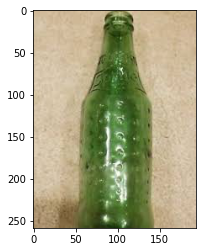


Sample cardboard image:


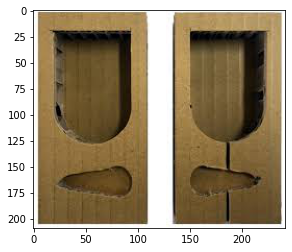

Sample paper image:


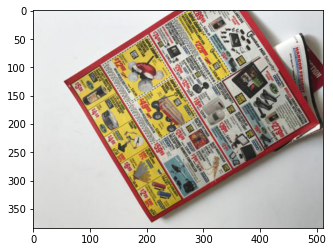


Sample metal image:


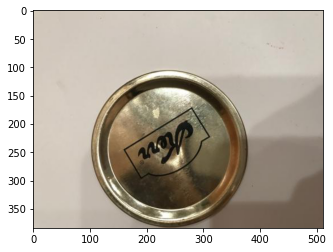


Sample plastic image:


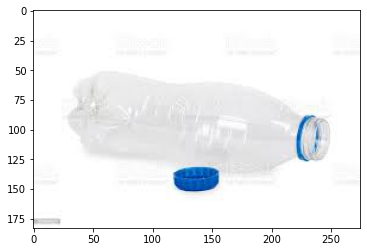

In [5]:
print("Sample glass image:")
plt.imshow(load_img(f"{os.path.join(TRAINING_Kaca_DIR, os.listdir(TRAINING_Kaca_DIR)[100])}"))
plt.show()

print("\nSample cardboard image:")
plt.imshow(load_img(f"{os.path.join(TRAINING_Kardus_DIR, os.listdir(TRAINING_Kardus_DIR)[50])}"))
plt.show()

print("Sample paper image:")
plt.imshow(load_img(f"{os.path.join(TRAINING_Kertas_DIR, os.listdir(TRAINING_Kertas_DIR)[10])}"))
plt.show()

print("\nSample metal image:")
plt.imshow(load_img(f"{os.path.join(TRAINING_Metal_DIR, os.listdir(TRAINING_Metal_DIR)[5])}"))
plt.show()

print("\nSample plastic image:")
plt.imshow(load_img(f"{os.path.join(TRAINING_Plastik_DIR, os.listdir(TRAINING_Plastik_DIR)[0])}"))
plt.show()


In [6]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1/255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode="nearest")

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=100,
                                                      class_mode="sparse",
                                                      target_size=(200, 200))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1/255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=100,
                                                                class_mode="sparse",
                                                                target_size=(200, 200))
  
  return train_generator, validation_generator


In [7]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 5611 images belonging to 5 classes.
Found 2390 images belonging to 5 classes.


In [8]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

In [9]:
def create_model():
  model = tf.keras.models.Sequential([ 
      tf.keras.layers.Conv2D(16, (3,3), activation = "relu", input_shape=(200,200,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation = "relu"),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation = "relu"),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation = "relu"),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(512, activation = "relu"),
      tf.keras.layers.Dense(5, activation = "softmax")
  ])

  
  model.compile(optimizer="Adam",
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy']) 
  
  return model

In [10]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [11]:
#Train the model
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 1000,
                    verbose = 2,
                    callbacks=callbacks)

Epoch 1/1000
57/57 - 78s - loss: 1.3335 - accuracy: 0.4489 - val_loss: 1.3183 - val_accuracy: 0.4226 - 78s/epoch - 1s/step
Epoch 2/1000
57/57 - 62s - loss: 1.0602 - accuracy: 0.5632 - val_loss: 1.3006 - val_accuracy: 0.4331 - 62s/epoch - 1s/step
Epoch 3/1000
57/57 - 62s - loss: 0.9750 - accuracy: 0.5992 - val_loss: 1.2364 - val_accuracy: 0.4824 - 62s/epoch - 1s/step
Epoch 4/1000
57/57 - 63s - loss: 0.9300 - accuracy: 0.6348 - val_loss: 1.2494 - val_accuracy: 0.4732 - 63s/epoch - 1s/step
Epoch 5/1000
57/57 - 62s - loss: 0.8837 - accuracy: 0.6457 - val_loss: 1.2320 - val_accuracy: 0.5188 - 62s/epoch - 1s/step
Epoch 6/1000
57/57 - 62s - loss: 0.8587 - accuracy: 0.6646 - val_loss: 1.0242 - val_accuracy: 0.5900 - 62s/epoch - 1s/step
Epoch 7/1000
57/57 - 62s - loss: 0.8028 - accuracy: 0.6872 - val_loss: 1.1006 - val_accuracy: 0.5628 - 62s/epoch - 1s/step
Epoch 8/1000
57/57 - 63s - loss: 0.7985 - accuracy: 0.6933 - val_loss: 1.0389 - val_accuracy: 0.5816 - 63s/epoch - 1s/step
Epoch 9/1000
57/

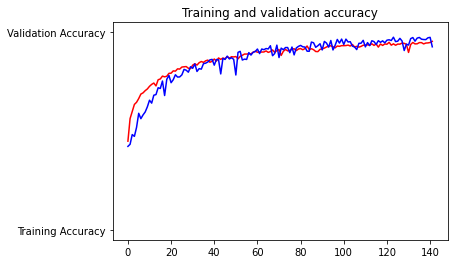

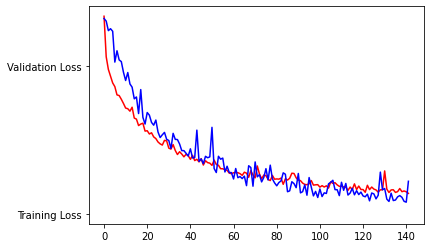

In [13]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()